import json
import ast
import os


directory = '../../data/cache/2020-05-12_13-42-02'
master = {}
master['apps'] = []

for file in os.listdir(directory):
    if file.endswith(".txt"):
        cache_file = os.path.join(directory, file)

        with open(cache_file, encoding='utf8') as f:
            for line in f:
                app_details = ast.literal_eval(line)
                master['apps'].append(app_details)

with open(directory+'/steamstore.json','w') as out:
    json.dump(master,out)

In [1]:
import pandas as pd
import json

In [12]:
data_path = '../data/cache/store_steamspy/apps.json'

with open(data_path, 'r', encoding='utf-8') as f:
    raw_data = json.load(f)

app_data = pd.DataFrame(raw_data['apps'])

FileNotFoundError: [Errno 2] No such file or directory: '../data/cache/store_steamspy/apps.json'

## Feature Engineering

already_released y/n
Release date


In [3]:
app_data.drop('supported_languages',axis=1,inplace=True)

In [4]:
app_data.drop('recommendations',axis=1, inplace=True)

In [5]:
def get(element,key):
    try:
        return element[key]
    except:
        return None

In [6]:
app_data['price'] = app_data['price_overview'].apply(lambda x: get(x,'initial'))
app_data.drop('price_overview',axis=1,inplace=True)

In [7]:
app_data['released'] = app_data['release_date'].apply(lambda x: not get(x,'coming_soon'))
app_data['release_date'] = app_data['release_date'].apply(lambda x: get(x, 'date'))


In [8]:
app_data.drop('genres',axis=1,inplace=True)

In [9]:
def get_owners(string):
    bounds = [int(item.replace(',','')) for item in string.split(' .. ')]
    return int((bounds[0]+bounds[1])/2)

In [10]:
app_data['median_owners'] = app_data['owners'].apply(get_owners)

In [11]:
app_data['categories'] = app_data['categories'].apply(lambda x: [{'id': 2, 'description': 'Single-player'}] if x is None else x)

In [12]:
app_data['categories'] = app_data['categories'].apply(lambda tags: [tag['description'] for tag in tags])

In [13]:
app_data.dropna(subset=['languages','developers'],inplace=True)

In [14]:
app_data['price'] = app_data.apply((lambda x: 0 if x['is_free']==True else x['price']), axis=1)

In [15]:
l = list(app_data['developers'])
flat_list = [item for sublist in l for item in sublist]

In [1]:
app_data.head()

NameError: name 'app_data' is not defined

In [17]:
user_data = pd.read_csv('../../data/steam-200k.csv')
user_data.columns = ['user_id','app_name','purchased','hours','0']

In [18]:
user_data.drop('0',axis=1,inplace=True)

In [19]:
user_data = user_data[user_data['purchased']=='play']

In [20]:
user_data.drop('purchased',axis=1,inplace=True)

In [21]:
len(user_data['app_name'].unique())

3600

In [22]:
user_data.head()

,user_id,app_name,hours
0,151603712,The Elder Scrolls V Skyrim,273.0
2,151603712,Fallout 4,87.0
4,151603712,Spore,14.9
6,151603712,Fallout New Vegas,12.1
8,151603712,Left 4 Dead 2,8.9


In [23]:
import math

In [24]:
user_data['log_hours'] = user_data['hours'].apply(lambda x: math.log((x+1)))

In [25]:
user_data['hours'].plot(kind='hist')

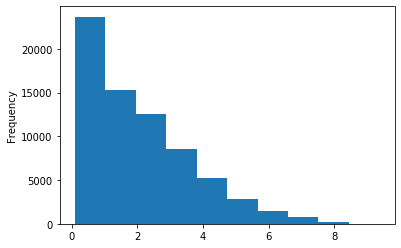

In [26]:
user_data['log_hours'].plot(kind='hist')

In [27]:
l = list(user_data['app_name'].unique())
print(l)

ngs Complete', 'Puzzle Chronicles', 'BattleSpace', 'Adventurer Manager', 'GoD Factory Wingmen', 'A.R.E.S. Extinction Agenda EX', 'Harvest Massive Encounter', 'Servo', 'Void Destroyer', 'Chroma Squad', 'Velvet Assassin', 'Guild Commander', 'Hacker Evolution Duality', 'Swarm Arena', 'Sokobond', 'Ys I', 'Legacy of Kain Soul Reaver', 'Slam Bolt Scrappers', 'Project Snowblind', 'Velocibox', 'PixelJunk Shooter Ultimate', 'The Settlers 7 Paths to a Kingdom', 'Space Hulk Ascension', 'Aion Collectors Edition', 'The Masterplan', 'Blood Bowl Dark Elves Edition', "Tom Clancy's H.A.W.X.", 'Buccaneer The Pursuit of Infamy', 'Age of Conan Rise of the Godslayer', 'Crusaders Thy Kingdom Come', 'Star Ruler', 'Star Wolves 3 Civil War', 'The Old Tree', 'Shadowgate MacVenture Series', 'Legends of Pegasus', 'Silent Hunter 5 Battle of the Atlantic', 'My Lands', 'SC2VN - The eSports Visual Novel', 'The Night of the Rabbit', 'The Jackbox Party Pack 2', 'Gun Metal', 'The Incredible Adventures of Van Helsing III

In [28]:
app_data['name_no_colon'] = app_data['name'].apply(lambda x: x.replace(':',''))

In [29]:
user_apps = pd.merge(user_data,app_data, how='left',left_on='app_name',right_on='name_no_colon')

In [30]:
user_apps.drop(['app_name','platforms','average_forever','average_2weeks','median_forever','median_2weeks','owners','name_no_colon'], axis=1,inplace=True)

In [31]:
user_apps.head()

,user_id,hours,log_hours,appid,name,is_free,developers,categories,release_date,publisher,positive,negative,languages,tags,price,released,median_owners
0,151603712,273.0,5.613128,72850.0,The Elder Scrolls V: Skyrim,False,[Bethesda Game Studios],"[Single-player, Steam Achievements, Steam Trad...","10 Nov, 2011",Bethesda Softworks,265979.0,15307.0,"English, French, German, Italian, Spanish - Sp...","{'Open World': 9786, 'RPG': 8503, 'Fantasy': 6...",999.0,True,7500000.0
1,151603712,87.0,4.477337,377160.0,Fallout 4,False,[Bethesda Game Studios],"[Single-player, Steam Achievements, Full contr...","9 Nov, 2015",Bethesda Softworks,150672.0,48110.0,"English, French, Italian, German, Spanish - Sp...","{'Open World': 8427, 'Post-apocalyptic': 7825,...",1999.0,True,7500000.0
2,151603712,14.9,2.766319,17390.0,Spore,False,[Maxis™],[Single-player],"19 Dec, 2008",Electronic Arts,21616.0,2426.0,"English, Czech, Danish, German, Spanish - Spai...","{'Simulation': 1163, 'Sandbox': 962, 'Open Wor...",1799.0,True,3500000.0
3,151603712,12.1,2.572612,22380.0,Fallout: New Vegas,False,[Obsidian Entertainment],"[Single-player, Steam Achievements, Partial Co...","21 Oct, 2010",Bethesda Softworks,91268.0,3698.0,"English, French, German, Italian, Spanish - Spain","{'Open World': 3479, 'RPG': 3331, 'Post-apocal...",799.0,True,3500000.0
4,151603712,8.9,2.292535,550.0,Left 4 Dead 2,False,[Valve],"[Single-player, Multi-player, PvP, Online PvP,...","19 Nov, 2009",Valve,343173.0,10379.0,"English, Danish, Dutch, Finnish, French, Germa...","{'Zombies': 19730, 'Co-op': 10149, 'FPS': 9133...",719.0,True,35000000.0


In [32]:
app_tags = app_data[['appid','name','tags']]

In [33]:
app_tags

,appid,name,tags
0,1257010,Passage to Malkuth,[]
1,1257190,VR Mini Bowling 2,"{'Indie': 31, 'Casual': 31, 'Sports': 31, 'VR'..."
2,1257210,Rabbit Simulator,"{'Casual': 132, 'Simulation': 132, 'Indie': 13..."
3,1257270,The Valley of Super Flowers,"{'Action': 57, 'Indie': 56, 'Casual': 56, 'Vio..."
4,1257280,Monuments Flipper,[]
...,...,...,...
39921,990720,Bookend,{'Indie': 22}
39922,990740,The Second Chance Strip Club,[]
39923,990750,RoboSnakes: Core Wars Legacy,"{'Strategy': 31, 'Indie': 31, 'Early Access': ..."
39924,990840,Running Tadpoles,[]


In [34]:
app_tags = app_tags[app_tags['tags'].apply(lambda x: len(x)>0)]

In [35]:
set([key for d in app_tags['tags'] for key in d])

{'1980s',
 "1990's",
 '2.5D',
 '2D',
 '2D Fighter',
 '2D Platformer',
 '360 Video',
 '3D',
 '3D Fighter',
 '3D Platformer',
 '3D Vision',
 '4 Player Local',
 '4X',
 '6DOF',
 'ATV',
 'Abstract',
 'Action',
 'Action RPG',
 'Action Roguelike',
 'Action-Adventure',
 'Addictive',
 'Adventure',
 'Agriculture',
 'Aliens',
 'Alternate History',
 'Ambient',
 'America',
 'Animation & Modeling',
 'Anime',
 'Arcade',
 'Archery',
 'Arena Shooter',
 'Artificial Intelligence',
 'Assassin',
 'Asymmetric VR',
 'Asynchronous Multiplayer',
 'Atmospheric',
 'Audio Production',
 'Auto Battler',
 'Automation',
 'Automobile Sim',
 'BMX',
 'Base-Building',
 'Baseball',
 'Based On A Novel',
 'Basketball',
 'Batman',
 'Battle Royale',
 "Beat 'em up",
 'Beautiful',
 'Benchmark',
 'Bikes',
 'Blood',
 'Board Game',
 'Bowling',
 'Boxing',
 'Building',
 'Bullet Hell',
 'Bullet Time',
 'CRPG',
 'Capitalism',
 'Card Battler',
 'Card Game',
 'Cartoon',
 'Cartoony',
 'Casual',
 'Cats',
 'Character Action Game',
 'Charac

In [36]:
app_tags['tag_only'] = app_tags['tags'].apply(lambda x: [d.replace(' ','_').lower() for d in x])

In [200]:
app_tags[app_tags['appid']==22330]

,appid,name,tags,tag_only,td
22800,22330,The Elder Scrolls IV: Oblivion,"{'RPG': 1302, 'Open World': 1246, 'Fantasy': 8...","[rpg, open_world, fantasy, singleplayer, modda...","([rpg, open_world, fantasy, singleplayer, modd..."


In [2]:
from gensim.models import word2vec
from gensim.models import doc2vec
from gensim.models.doc2vec import TaggedDocument

In [3]:
taglist = list(app_tags['tag_only'])

NameError: name 'app_tags' is not defined

In [40]:
model = word2vec.Word2Vec(taglist, size=1000, window=5, min_count=1, workers=4)

In [41]:
model.wv.most_similar('rpg')

[('mmorpg', 0.6196654438972473),
 ('traditional_roguelike', 0.5923815965652466),
 ('jrpg', 0.5906529426574707),
 ('dungeons_&_dragons', 0.5756229758262634),
 ('dragons', 0.5627028942108154),
 ('dungeon_crawler', 0.5462349653244019),
 ('deckbuilding', 0.542833685874939),
 ('rpgmaker', 0.5389683246612549),
 ('mystery_dungeon', 0.5361659526824951),
 ('card_battler', 0.5184588432312012)]

In [129]:
app_tags['td'] = app_tags.apply(lambda x: TaggedDocument(words=x['tag_only'], tags=[str(x.appid)]),axis=1)

In [130]:
app_tags

,appid,name,tags,tag_only,td
1,1257190,VR Mini Bowling 2,"{'Indie': 31, 'Casual': 31, 'Sports': 31, 'VR'...","[indie, casual, sports, vr, bowling, mini_golf]","([indie, casual, sports, vr, bowling, mini_gol..."
2,1257210,Rabbit Simulator,"{'Casual': 132, 'Simulation': 132, 'Indie': 13...","[casual, simulation, indie, rpg, action, early...","([casual, simulation, indie, rpg, action, earl..."
3,1257270,The Valley of Super Flowers,"{'Action': 57, 'Indie': 56, 'Casual': 56, 'Vio...","[action, indie, casual, violent, gore, platfor...","([action, indie, casual, violent, gore, platfo..."
5,1257520,"Zatorski, Ph.D.","{'Adventure': 107, 'RPG': 107, 'Indie': 107, '...","[adventure, rpg, indie, casual, dating_sim]","([adventure, rpg, indie, casual, dating_sim], ..."
6,1256520,Bone Appetit,"{'Action': 56, 'Metroidvania': 12, 'Pixel Grap...","[action, metroidvania, pixel_graphics, retro, ...","([action, metroidvania, pixel_graphics, retro,..."
...,...,...,...,...,...
39919,991510,Epic Food Fight,"{'Casual': 43, 'Action': 42, 'Indie': 42}","[casual, action, indie]","([casual, action, indie], [991510])"
39920,991530,Choice or Fate,"{'Adventure': 21, 'RPG': 21, 'Indie': 21, 'RPG...","[adventure, rpg, indie, rpgmaker]","([adventure, rpg, indie, rpgmaker], [991530])"
39921,990720,Bookend,{'Indie': 22},[indie],"([indie], [990720])"
39923,990750,RoboSnakes: Core Wars Legacy,"{'Strategy': 31, 'Indie': 31, 'Early Access': ...","[strategy, indie, early_access, programming, a...","([strategy, indie, early_access, programming, ..."


In [131]:

tagged_documents = list(app_tags['td'])

In [132]:
d2v = doc2vec.Doc2Vec(tagged_documents,window=5,min_count=1,workers=6)

In [16]:
def get_appid(name):
    return str(app_data[app_data['name']==name]['appid'].iloc[0])

In [8]:
get_appid("Cuphead")

NameError: name 'app_data' is not defined

In [255]:
positives = []
negatives = []
positives.append(d2v.docvecs['32440'])
positives.append(d2v.docvecs['249130'])
# positives.append(d2v.docvecs['7940'])


In [256]:

similarity = d2v.docvecs.most_similar(positive=positives, negative=negatives,topn=34071)
similar_games = pd.DataFrame(similarity,columns=['appid','d2v_similarity'])
similar_games['appid'] = similar_games['appid'].astype(int)

similar_games = similar_games.merge(app_data[['appid','name','positive']], how='left',on='appid')

In [259]:
similar_games

,appid,d2v_similarity
0,32440,0.933729
1,249130,0.916285
2,404050,0.915549
3,32450,0.915342
4,1049820,0.907251
...,...,...
34065,384840,-0.865542
34066,505330,-0.874605
34067,882040,-0.880036
34068,1094250,-0.881942


In [261]:
similar_games['scaled_positives'] = similar_games['positive']+1
similar_games['scaled_positives'] = similar_games['scaled_positives'].apply(math.log)

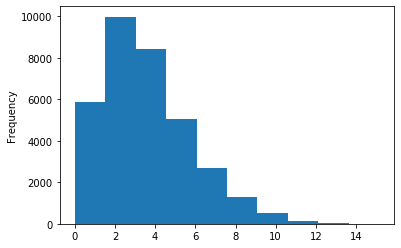

In [262]:
similar_games['scaled_positives'].plot(kind='hist')

In [263]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [264]:
similar_games['scaled_positives'] = scaler.fit_transform(similar_games['scaled_positives'].values.reshape(-1,1))

In [275]:
similar_games['score'] = similar_games['d2v_similarity']+ 0.28*similar_games['scaled_positives']

In [276]:
similar_games.sort_values(by='score',ascending=False).head(20)

,appid,d2v_similarity,name,positive,scaled_positives,score
0,32440,0.933729,LEGO® Star Wars™: The Complete Saga,7796,0.591494,1.099348
1,249130,0.916285,LEGO® MARVEL Super Heroes,10361,0.610266,1.087160
23,274190,0.882892,Broforce,36829,0.693970,1.077204
22,207140,0.883147,SpeedRunners,24310,0.666553,1.069782
12,95400,0.891228,ibb & obb,3640,0.541234,1.042773
105,265930,0.841311,Goat Simulator,48595,0.712269,1.040746
282,252950,0.799906,Rocket League,378412,0.847738,1.037273
339,440,0.789325,Team Fortress 2,624994,0.880856,1.035965
32,275390,0.877480,Guacamelee! Super Turbo Championship Edition,4399,0.553731,1.032525
17,230270,0.887355,N++,1958,0.500323,1.027445


In [274]:
d2v.save('../../models/doc2vec.pickle')

In [4]:
app_list = pd.read_csv('../data/processed/app_data.csv')

In [5]:
app_list.sort_values(['median_owners','positive'],ascending=(False, False),inplace=True)
app_list = app_list.sort_values(['median_owners','positive'],ascending=(False, False))[['name','appid']]

In [20]:
model = gensim.models.Doc2Vec.load('../models/doc2vec.pickle')

In [14]:
app_list.to_csv('../data/processed/app_list.csv',index=False,header=False)

In [19]:
import gensim.models

In [3]:
import pandas as pd

In [7]:
app_titles = [title for title in app_list]

In [12]:
def search_list(term, target_list):
    return (term.lower() in target_list)

def get_superstrings(term, target_list):
    term = term.lower()
    superstrings = []
    for string in target_list:
        if string.lower().startswith(term):
            superstrings.append(string)
    return superstrings

In [54]:
%%time
get_superstrings('Lego',app_titles)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.8 ms


['LEGO® MARVEL Super Heroes',
 'LEGO® Worlds',
 'LEGO® Star Wars™: The Complete Saga',
 'LEGO® The Hobbit™',
 'LEGO® STAR WARS™: The Force Awakens',
 'LEGO® Batman™ 3: Beyond Gotham',
 'LEGO® Harry Potter: Years 1-4',
 "LEGO® MARVEL's Avengers",
 'LEGO® Star Wars™ III: The Clone Wars™',
 'LEGO® Batman™: The Videogame',
 'LEGO® City Undercover',
 'LEGO® Batman™ 2: DC Super Heroes',
 'LEGO® Harry Potter: Years 5-7',
 'LEGO® MARVEL Super Heroes 2',
 'LEGO® Pirates of the Caribbean The Video Game',
 'LEGO® DC Super-Villains',
 'LEGOⓇ Indiana Jones™: The Original Adventures',
 'LEGO® Indiana Jones™ 2: The Adventure Continues',
 'LEGO® The Incredibles']

In [17]:
get_appid('DARK SOULS™ III')

'374320'

In [56]:
positives = [model['star_wars'],model['lego']]
negatives = []

similarity = model.docvecs.most_similar(positive=positives, negative=negatives,topn=20)
similar_games = pd.DataFrame(similarity,columns=['appid','d2v_similarity'])
similar_games['appid'] = similar_games['appid'].astype(int)

similar_games = similar_games.merge(app_data[['appid','name','positive']], how='left',on='appid')

In [57]:
similar_games

,appid,d2v_similarity,name,positive
0,20,0.945459,Team Fortress Classic,4160
1,320,0.938034,Half-Life 2: Deathmatch,7421
2,879000,0.923910,Comanche,92
3,730,0.919327,Counter-Strike: Global Offensive,3800328
4,440,0.917229,Team Fortress 2,624994
5,819280,0.915543,ZAMB! Endless Extermination,18
6,735280,0.914555,EMERGENCY 20,430
7,869750,0.911394,Super Chicken Catchers,17
8,13230,0.911234,Unreal Tournament 2004,2611
9,212070,0.909936,Star Conflict,9612


In [58]:
app_data

,Unnamed: 0,appid,name,is_free,developers,platforms,categories,release_date,publisher,positive,...,owners,average_forever,average_2weeks,median_forever,median_2weeks,languages,tags,price,released,median_owners
0,0,1257010,Passage to Malkuth,False,['Pixel Purrfection'],"{'windows': True, 'mac': True, 'linux': True}","['Single-player', 'Steam Achievements']",Q4 2020,Pixel Purrfection,0,...,"0 .. 20,000",0,0,0,0,English,[],NaN,False,10000
1,1,1257190,VR Mini Bowling 2,False,"['Brian Macumber', 'Kevin Macumber']","{'windows': True, 'mac': False, 'linux': False}","['Single-player', 'Multi-player', 'Steam Leade...","10 Apr, 2020",Brian Macumber,2,...,"0 .. 20,000",0,0,0,0,English,"{'Indie': 31, 'Casual': 31, 'Sports': 31, 'VR'...",1029.0,True,10000
2,2,1257210,Rabbit Simulator,False,['Meng Games'],"{'windows': True, 'mac': False, 'linux': False}","['Single-player', 'Steam Achievements', 'Steam...","20 Mar, 2020",Meng Games,16,...,"0 .. 20,000",0,0,0,0,"English, French, German, Spanish - Spain, Russ...","{'Casual': 132, 'Simulation': 132, 'Indie': 13...",399.0,True,10000
3,3,1257270,The Valley of Super Flowers,False,['Anamik Majumdar'],"{'windows': True, 'mac': False, 'linux': True}","['Single-player', 'Steam Achievements', 'Full ...","27 Mar, 2020",Anamik Majumdar,0,...,"0 .. 20,000",0,0,0,0,English,"{'Action': 57, 'Indie': 56, 'Casual': 56, 'Vio...",79.0,True,10000
4,4,1257280,Monuments Flipper,False,['Games Incubator'],"{'windows': True, 'mac': False, 'linux': False}",['Single-player'],Coming soon,"PlayWay S.A., Games Incubator",0,...,"0 .. 20,000",0,0,0,0,"English, French, Italian, German, Spanish - Sp...",[],NaN,False,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,39921,990720,Bookend,True,['Paper Crown Interactive'],"{'windows': True, 'mac': False, 'linux': False}",['Single-player'],"6 Mar, 2019",Paper Crown Interactive,15,...,"0 .. 20,000",0,0,0,0,English,{'Indie': 22},0.0,True,10000
39749,39922,990740,The Second Chance Strip Club,False,['Musclecrab'],"{'windows': True, 'mac': False, 'linux': False}","['Single-player', 'Steam Achievements', 'Full ...","4 Apr, 2019",Musclecrab,0,...,"0 .. 20,000",0,0,0,0,English,[],349.0,True,10000
39750,39923,990750,RoboSnakes: Core Wars Legacy,False,['ALIENS Corporation'],"{'windows': True, 'mac': False, 'linux': False}",['Single-player'],"26 Dec, 2018",ALIENS Corporation,6,...,"0 .. 20,000",0,0,0,0,English,"{'Strategy': 31, 'Indie': 31, 'Early Access': ...",1549.0,True,10000
39751,39924,990840,Running Tadpoles,False,['Mr. Neighbor'],"{'windows': True, 'mac': False, 'linux': False}",['Single-player'],"21 Dec, 2018",Mr. Neighbor,0,...,"0 .. 20,000",0,0,0,0,English,[],79.0,True,10000
